# Sensitivity Analysis Visualization
- V.2 27-Dec-2024 - Clean
- Use CI and std. dev. to indicate uncertainty
- Error bar = CI or std.dev values

In [175]:
import matplotlib.pyplot as plt
import numpy as np

## Utility functions

```
plot_SA(lr, Avg_Episode_Rewards, rewards_LB, rewards_UB, CI, x_ticks, activation, gamma, type = 'bar')
plot_CI_error_bounds(lr, Avg_Episode_Rewards, rewards_LB, rewards_UB, CI, x_ticks, activation, gamma, type = 'fill')
plot_CI_error_bounds(lr, Avg_Episode_Rewards, rewards_LB, rewards_UB, CI, x_ticks, activation, gamma, type = 'bar') ```

### ReLU Set

In [176]:
Episodes = 800

ReLU_set = []

gamma = 0.99
Avg_Episode_Rewards = [2.097, 1.693, -0.123, -0.669, -1.273]
Std_Dev = [0.884, 1.174, 0.984, 0.371, 0.110]
CI = [0.061, 0.081, 0.068, 0.026, 0.008]
ReLU_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

gamma = 0.950
Avg_Episode_Rewards = [1.564, 0.623, 0.087, -0.782, -1.106]
Std_Dev = [1.154, 1.678, 1.384, 0.261, 0.088]
CI = [0.080, 0.116, 0.096, 0.018, 0.006]
ReLU_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

gamma = 0.900
Avg_Episode_Rewards = [-2.400, -1.968, -0.659, -0.434, -1.604]
Std_Dev = [0.140, 1.600, 0.505, 0.448, 0.076]
CI = [0.010, 0.111, 0.035, 0.031, 0.005]
ReLU_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

### Tanh Set

In [177]:
Tanh_set = []
# Tanh Set
gamma = 0.99
Avg_Episode_Rewards = [-1.547, 1.785, 0.139, 0.140, -0.848]
Std_Dev = [1.774, 1.257, 1.233, 0.967, 0.142]
CI = [0.123, 0.087, 0.085, 0.067, 0.010]
Tanh_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

gamma = 0.950
Avg_Episode_Rewards = [-2.497, -1.877, 0.878, -0.200, -1.552]
Std_Dev = [1.292, 1.708, 1.450, 0.875, 0.103]
CI = [0.090, 0.118, 0.101, 0.061, 0.007]
Tanh_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

gamma = 0.900
Avg_Episode_Rewards = [-1.739, -2.357, 0.518, -0.531, -0.651]
Std_Dev = [1.750, 1.389, 1.038, 0.682, 0.191]
CI = [0.121, 0.096, 0.072, 0.047, 0.013]
Tanh_set.append([gamma, [*Avg_Episode_Rewards], [*CI]])

In [178]:
def plot_SA(x, y, y_LB, y_UB, y_err, x_ticks, activation, gamma, type='bar'):
    import seaborn as sns
    sns.set()

    title = f'Effect of Learning Rate for\n $\gamma$={gamma} and activation function={activation}'
    
    textstr = '\n'.join((r'activation:%s' % (activation, ), '$\gamma=%.2f$' % (gamma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)

    n = len(y)
    a = np.arange(n)

    fig, ax = plt.subplots(figsize=(4, 3))
    center_line = ax.plot(a, y, 'b-')
    if (type == 'bar'):
        plt.errorbar(a, y, yerr = y_err, fmt ='o')
    else:
        fill = ax.fill_between(a, y_LB,  y_UB, color='b', alpha=0.2)

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    ax.invert_xaxis()
    ax.xaxis.set_ticks(a)
    ax.xaxis.set_ticklabels(x_ticks)
    plt.title(title)
    plt.show()

In [179]:
def plot_CI_error_bounds(x, y, y_LB, y_UB, y_err, x_ticks, activation, gamma, type='bar'):
    import seaborn as sns
    sns.set()

    title = f'Effect of Learning Rate for\n $\gamma$={gamma} and activation function={activation}'
    
    textstr = '\n'.join((r'activation:%s' % (activation, ), '$\gamma=%.2f$' % (gamma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
    
    fig, ax = plt.subplots(figsize=(4, 3))

    center_line = ax.plot(x, y, 'b-')
    if (type == 'bar'):
        plt.errorbar(x, y, yerr = y_err, fmt ='o')
    else:
        fill = ax.fill_between(x, y_LB,  y_UB, color='#06A2AC', alpha=0.2)

    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    ax.set_xticks(x, x_ticks)
    ax.set_xticklabels(ax.get_xticks(), rotation = 50)    
    # plt.suptitle(title, fontsize=14, y=1)
    plt.title(title)
    plt.show()

In [180]:
lr = [1.0E-02, 5.0E-03, 1.0E-03, 5.0E-04, 1.0E-04]
x_ticks = ['1e-2', '5e-3', '1e-3', '5e-4', '1e-4']


 Tanh results 0


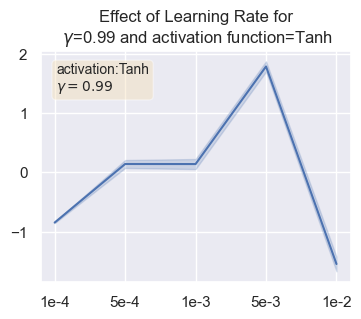


 Tanh results 1


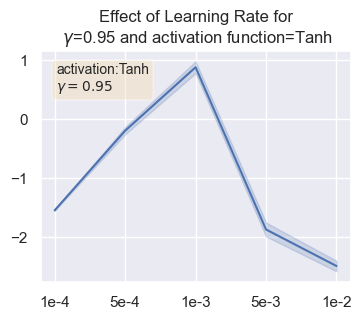


 Tanh results 2


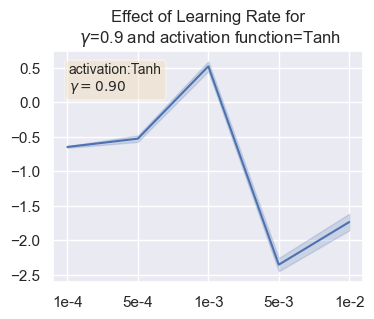

In [181]:
activation = 'Tanh'
for n in range(3):
    print(f'\n Tanh results {n}')    
    gamma = Tanh_set[n][0]
    Avg_Episode_Rewards = Tanh_set[n][1]
    CI = Tanh_set[n][2]

    LB = (Avg_Episode_Rewards, [-1 * ci for ci in CI])
    UB = (Avg_Episode_Rewards, CI)
    
    rewards_LB = [sum(values) for values in zip(*LB)]
    rewards_UB = [sum(values) for values in zip(*UB)]

    plot_SA(lr, Avg_Episode_Rewards, rewards_LB, rewards_UB, CI, x_ticks, activation, gamma, type = 'fill')


 ReLU results 0


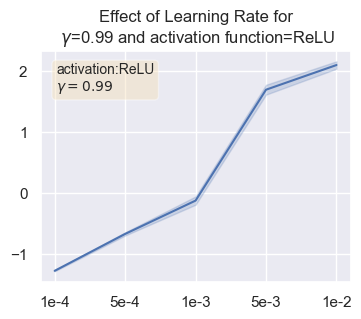


 ReLU results 1


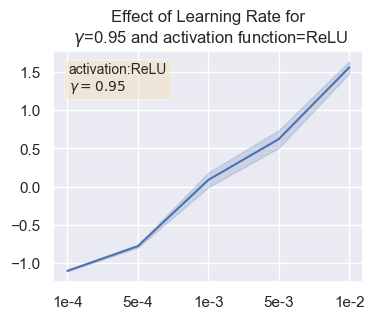


 ReLU results 2


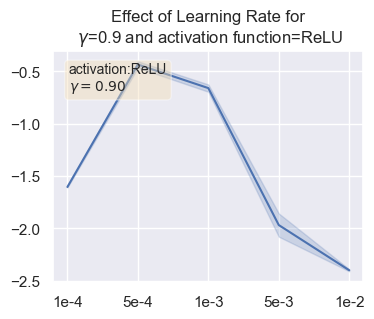

In [182]:
activation = 'ReLU'
for n in range(3):
    print(f'\n ReLU results {n}')    
    gamma = ReLU_set[n][0]
    Avg_Episode_Rewards = ReLU_set[n][1]
    CI = ReLU_set[n][2]

    LB = (Avg_Episode_Rewards, [-1 * ci for ci in CI])
    UB = (Avg_Episode_Rewards, CI)
    
    rewards_LB = [sum(values) for values in zip(*LB)]
    rewards_UB = [sum(values) for values in zip(*UB)]

    plot_SA(lr, Avg_Episode_Rewards, rewards_LB, rewards_UB, CI, x_ticks, activation, gamma, type = 'fill')